<a href="https://colab.research.google.com/github/HerikDouglas/exercicios_residencia_tic/blob/main/oficina_aula_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imagine que você tem um conjunto de dados que contém as notas de alunos de três turmas diferentes, registradas em diferentes formatos (algumas em números de 0 a 10, outras em letras como A, B, C).

Seu objetivo é analisar o desempenho dos alunos de todas as turmas juntos. Quais passos você seguiria para transformar e combinar esses dados, permitindo uma análise precisa e padronizada? Descreva as etapas que você realizaria e as ferramentas que utilizaria, com base nos conceitos aprendidos.

1 - Identificação e Transformação dos Dados:



- Primeiro, identifique as diferentes formas de registro das notas (números e letras). Utilize a técnica de substituição para transformar as notas em letras (A, B, C) para uma escala numérica correspondente (por exemplo, A = 10, B = 8, C = 6). Essa transformação é essencial para padronizar os dados, garantindo que todas as notas estejam na mesma escala numérica e facilitando a análise conjunta.


In [ ]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#turmas com diferentes formatos de notas

turma_1 = pd.DataFrame({
    'Aluno': ['João', 'Lucas', 'Rafael'],
    'Nota': [10, 6.5, 5.5]
})

turma_2 = pd.DataFrame({
    'Aluno': ['Mara', 'Fernando', 'José'],
    'Nota': ['B', 8.5, 'C']
})

turma_3 = pd.DataFrame({
    'Aluno': ['Miguel', 'Eduardo', 'Liah'],
    'Nota': ['A', 5, 3.5]
})

print('Dados da turma 1')
print(turma_1)
print('--'*10)
print('Dados da turma 2')
print(turma_2)
print('--'*10)
print('Dados da turma 3')
print(turma_3)

Dados da turma 1
    Aluno  Nota
0    João  10.0
1   Lucas   6.5
2  Rafael   5.5
--------------------
Dados da turma 2
      Aluno Nota
0      Mara    B
1  Fernando  8.5
2      José    C
--------------------
Dados da turma 3
     Aluno Nota
0   Miguel    A
1  Eduardo    5
2     Liah  3.5


3 - Combinação dos Conjuntos de Dados:

Utilize a função concat() do pandas para combinar os registros de notas das três turmas em um único DataFrame. Essa etapa permite que você una todos os dados em um único conjunto, possibilitando uma análise conjunta das turmas.



In [ ]:
#Juntando os dados em um único df
dados = pd.concat([turma_1, turma_2, turma_3], ignore_index=True)

print('Df com as três turmas juntas')
print(dados)

Df com as três turmas juntas
      Aluno  Nota
0      João  10.0
1     Lucas   6.5
2    Rafael   5.5
3      Mara     B
4  Fernando   8.5
5      José     C
6    Miguel     A
7   Eduardo     5
8      Liah   3.5


2 - Padronização dos Dados:

Após a substituição, verifique se todas as notas estão dentro de uma escala uniforme. Se necessário, aplique uma técnica de normalização para ajustar as notas a uma escala comum, como de 0 a 10. Isso é importante para assegurar que as notas sejam comparáveis entre as turmas, evitando distorções na análise.

In [ ]:
#criando função para converter nota
def padronizar_nota(nota):
  if isinstance(nota, str):
    if nota == 'A':
      return 10
    elif nota == 'B':
      return 8
    elif nota == 'C':
      return 6
    else:
      return None
  return nota

dados['nota_numerica'] = dados['Nota'].apply(padronizar_nota)
print('Notas padronizadas')
print(dados[['Aluno', 'nota_numerica']])

Notas padronizadas
      Aluno  nota_numerica
0      João           10.0
1     Lucas            6.5
2    Rafael            5.5
3      Mara            8.0
4  Fernando            8.5
5      José            6.0
6    Miguel           10.0
7   Eduardo            5.0
8      Liah            3.5


4 - Análise e Visualização dos Dados:

Com os dados padronizados e combinados, você pode proceder com a análise. Crie gráficos usando matplotlib ou seaborn para visualizar o desempenho geral das turmas, como um gráfico de distribuição para observar a dispersão das notas ou um gráfico de barras comparando a média de cada turma.

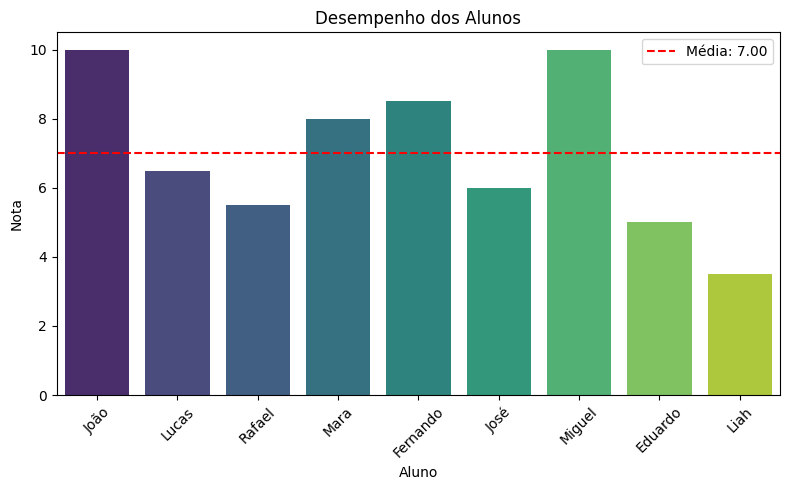

In [ ]:
from os import linesep
#usando dropna com argumento subset para eliminar linhas com valores ausentes, de acordo com a coluna 'nota_numerica', caso existam
dados = dados.dropna(subset=['nota_numerica'])

#calculo da media para usar no gráfico
media = dados['nota_numerica'].mean()

#Visualização do dados
plt.figure(figsize=(8, 5))
sns.barplot(x='Aluno', y='nota_numerica', hue='Aluno', data=dados, palette='viridis', legend=False)
plt.axhline(media, color='red', linestyle='--', label=f'Média: {media:.2f}')
plt.title('Desempenho dos Alunos')
plt.ylabel('Nota')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Análises adicionais por turma

In [ ]:
#utilizando função 'padronizar_nota' para padronizar as notas por turmas

turma_1['nota_padronizada'] = turma_1['Nota'].apply(padronizar_nota)
print(turma_1)
print('--' * 17)
media_1 = turma_1['nota_padronizada'].mean()



turma_2['nota_padronizada'] = turma_2['Nota'].apply(padronizar_nota)
print(turma_2)
media_2 = turma_2['nota_padronizada'].mean()

print('--' * 17)

turma_3['nota_padronizada'] = turma_3['Nota'].apply(padronizar_nota)
print(turma_3)
media_3 = turma_3['nota_padronizada'].mean()



    Aluno  Nota  nota_padronizada
0    João  10.0              10.0
1   Lucas   6.5               6.5
2  Rafael   5.5               5.5
----------------------------------
      Aluno Nota  nota_padronizada
0      Mara    B               8.0
1  Fernando  8.5               8.5
2      José    C               6.0
----------------------------------
     Aluno Nota  nota_padronizada
0   Miguel    A              10.0
1  Eduardo    5               5.0
2     Liah  3.5               3.5


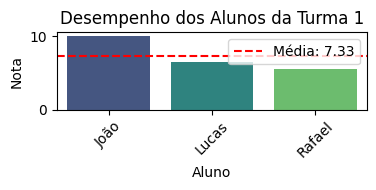

In [ ]:
#Visualização do dados turma 1
plt.figure(figsize=(4, 2))
sns.barplot(x='Aluno', y='nota_padronizada', hue='Aluno', data=turma_1, palette='viridis', legend=False)
plt.axhline(media_1, color='red', linestyle='--', label=f'Média: {media_1:.2f}')
plt.title('Desempenho dos Alunos da Turma 1')
plt.ylabel('Nota')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


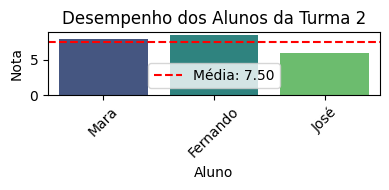

In [ ]:
#Visualização do dados turma 2
plt.figure(figsize=(4, 2))
sns.barplot(x='Aluno', y='nota_padronizada', hue='Aluno', data=turma_2, palette='viridis', legend=False)
plt.axhline(media_2, color='red', linestyle='--', label=f'Média: {media_2:.2f}')
plt.title('Desempenho dos Alunos da Turma 2')
plt.ylabel('Nota')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

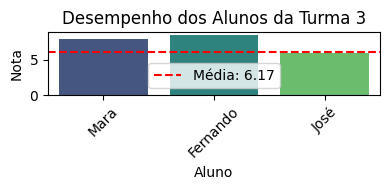

In [ ]:
#Visualização do dados turma 3
plt.figure(figsize=(4, 2))
sns.barplot(x='Aluno', y='nota_padronizada', hue='Aluno', data=turma_2, palette='viridis', legend=False)
plt.axhline(media_3, color='red', linestyle='--', label=f'Média: {media_3:.2f}')
plt.title('Desempenho dos Alunos da Turma 3')
plt.ylabel('Nota')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()